In [1]:
import numpy as np
from scipy import misc
import scipy.fftpack
import cv2
import matplotlib.pyplot as plt
from os import listdir, remove
from os.path import isfile, join

image_format = ".jpg"

##### Convert the video into images

In [2]:
# Load video
vidcap = cv2.VideoCapture('pokemon.mp4')

# Function to do the conversion
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("Converted Images/image" + str(count) + image_format, image)     # save frame as JPG file
    return hasFrames

# Start converting the video
sec = 0
frameRate = 0.01 #//it will capture image in each 0.01 second
count = 1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

##### Convert the images into a single matrix

In [3]:
# Set the path for images
mypath = '/Users/frafiei3/Desktop/Georgia Tech/Special problems/Code/Converted Images'

# Find all the images in the path
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
onlyfiles = [ f for f in onlyfiles if image_format in f]

# Find the dimension of the images
img_rows, img_cols, _ = cv2.imread(join(mypath,onlyfiles[0])).shape

# Set an empty matrix corresponding to the dimension of images and number of frames
images_gray = np.empty([img_rows, img_cols, len(onlyfiles)], dtype=object)

# Convert RGB images into gray scale images and store them in a single matrix
for n in range(len(onlyfiles)):
    images_gray[:,:,n] = cv2.cvtColor(cv2.imread(join(mypath,onlyfiles[n])), cv2.COLOR_BGR2GRAY)

In [4]:
data = np.array(images_gray,dtype='float64')
data.shape

(192, 320, 1168)

In [9]:
frameRate = 0.01
T = frameRate    # sampling spacing (s)
N = data.shape[2] # Number of samples
x = np.linspace(0.0, N*T, N)

data_fft = np.zeros(data.shape, dtype=complex)
for row in range(data.shape[0]):
    for col in range(data.shape[1]):
        y = data[row, col, :]
        yf = scipy.fftpack.fft(y)
        data_fft[row, col, :] = yf


#### Plot fft for a single pixel

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


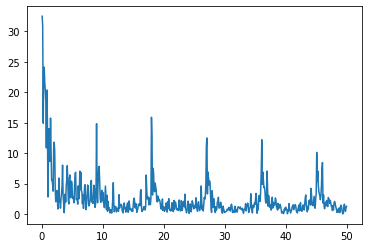

In [39]:
# insert the location of pixel
pixel_row, pixel_col = 100, 100

# Do you want the constant term (frequency=0) to be included?
constant_term = False

# plot
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
fig, ax = plt.subplots()
if constant_term is False:
    ax.plot(xf[1:], 2.0/N * np.abs(data_fft[pixel_row, pixel_col, 1:N//2]))
else:
    ax.plot(xf, 2.0/N * np.abs(data_fft[pixel_row, pixel_col, :N//2]))
        
plt.show()

#### Plot amplitude of fourier transform for all pixels at desired frequency

In [27]:
# This function finds corresponding index in data_fft to capture the desired frequency
def find_nearest_idx(array, value):
    array = np.asarray(array)
    return (np.abs(array - value)).argmin()

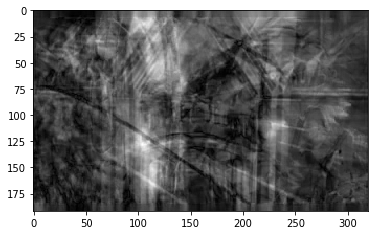

In [37]:
# Insert the frequency:
freq_to_observe = 5     # Hz

# Plot
f_idx = find_nearest_idx(xf, freq_to_observe) 
plt.imshow(np.abs(data_fft[:,:,f_idx]), cmap="gray")
plt.show()